In [7]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def get_curts_FYMILP(case):
    df_curts_FYMILP = pd.read_csv(f"A.The_full_year_MILP/{case}/4.OutWoInv/oT_Result_RESCurtailment_{case}.csv")
    # Only considering existing lines:
    #df_utils_existing = df_utils_FYMILP[df_utils_FYMILP["Circuit"] == "eac1"]
    
    return df_curts_FYMILP

def extract_FYMILP_one_generator(all_curts_FYMILP,unit): 
    filter_this_gen = (all_curts_FYMILP["Unit"] == unit)
    curts_this_gen_FYMILP = all_curts_FYMILP[filter_this_gen]

    ts_this_gen_FYMILP = curts_this_gen_FYMILP.MW.to_numpy()
    return ts_this_gen_FYMILP

def extract_CM_one_gen(case,cm,nbc,unit): 
    ts_CM_All_lines = pd.read_csv(f"Y.FYTS_from_ByStages/{case}/{cm}/Curtailment_nc{nbc}_2.csv",header = [0],index_col=0)
    ts_this_line_CM = ts_CM_All_lines.loc[:,unit].to_numpy()
    return ts_this_line_CM

In [10]:
## Extract fyts for multiple lines 

case = "IEEE118_mod1"

## FYMILP
all_curts_FYMILP = get_curts_FYMILP(case)

unique_generators = [x for x in all_curts_FYMILP["Unit"].drop_duplicates().values.tolist()]
nb_gens = len(unique_generators)

correls_v,total_diffs_v,total_devs_v,nbcs_v,cms_v = [],[],[],[],[]


##CM 
cm = "R&D"
for cm in ["R&D","CHI","OPT_LB","HI","OPC"]:
    for nbc in [10,20,50,100,150]:


#         ts_all_gens_CM=np.zeros(8736*nb_gens)
#         ts_all_gens_FYMILP=np.zeros(8736*nb_gens)
        ts_all_gens_CM=np.zeros(8736)
        ts_all_gens_FYMILP=np.zeros(8736)

        for i,generator in enumerate(unique_generators): 
            ts_this_gen_FYMILP = extract_FYMILP_one_generator(all_curts_FYMILP,generator)
            ts_this_gen_CM = extract_CM_one_gen(case,cm,nbc,generator)
            i_start =0
            i_end = 8736
            ts_all_gens_FYMILP[i_start:i_end] +=ts_this_gen_FYMILP
            ts_all_gens_CM[i_start:i_end] += ts_this_gen_CM

        total_dev= np.sum(np.abs((ts_all_gens_CM-ts_all_gens_FYMILP)))
        total_dev= np.sum((ts_all_gens_CM-ts_all_gens_FYMILP))
        correlation = np.corrcoef(ts_all_gens_FYMILP,ts_all_gens_CM)[0,1]

        cms_v.append(cm)
        nbcs_v.append(nbc)
        
        total_flow = np.sum((np.abs((ts_all_gens_FYMILP))))

        correls_v.append(correlation)
        total_diffs_v.append(total_dev)
        total_devs_v.append(total_dev/total_flow)
        print(generator)

df = pd.DataFrame({"CM":cms_v,"nbc":nbcs_v,"Correlation": correls_v,"Total diff":total_diffs_v,"Total dev":total_devs_v})


Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03
Solar 03


In [ ]:
df

In [15]:
generator, extract_FYMILP_one_generator(all_curts_FYMILP,generator)

('101_PV_1',
 array([0.       , 0.       , 0.353112 , ..., 0.       , 0.5373444,
        0.5373444]))

In [16]:
extract_CM_one_gen(case,cm,nbc,generator)

array([0.49128632, 0.49128632, 0.49128632, ..., 0.        , 0.        ,
       0.        ])

<Axes: xlabel='nbc', ylabel='Correlation'>

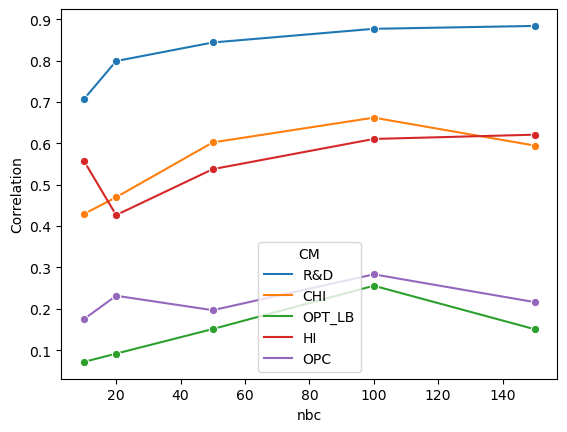

In [11]:
x = "nbc"
y= "Correlation"
sns.lineplot(data = df,x = x, y = y,hue = "CM",marker = "o")

<Axes: xlabel='nbc', ylabel='Total dev'>

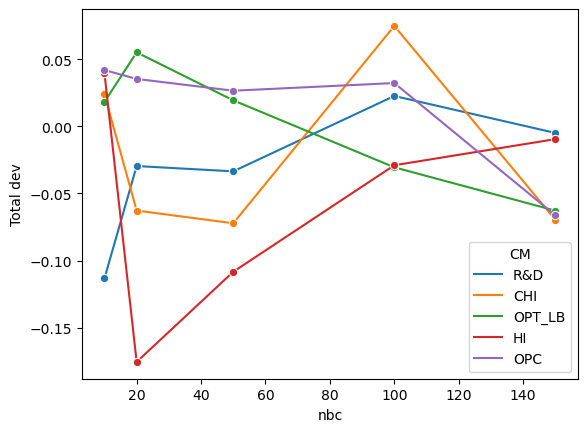

In [12]:
x = "nbc"
y= "Total dev"
sns.lineplot(data = df,x = x, y = y,hue = "CM",marker = "o")